In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image
from enhance_trans import enhance_trans
import torch

# sad vscode user
import os, sys
os.chdir(sys.path[0])
save = False

def set_seed(seed=1):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

set_seed()

original pic


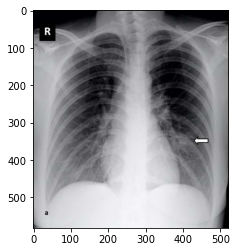

In [2]:
img_path = 'sample1.png'
img = Image.open(img_path).convert('RGB')
plt.imshow(img)
# img.show()

In [3]:
def transform_invert(img_, transform_train):
    """
    transform a standardized image to original image
    :param img_: tensor
    :param transform_train: torchvision.transforms
    :return: PIL image
    """
    if 'Normalize' in str(transform_train):
        norm_transform = list(filter(lambda x: isinstance(x, transforms.Normalize), transform_train.transforms))
        mean = torch.tensor(norm_transform[0].mean, dtype=img_.dtype, device=img_.device)
        std = torch.tensor(norm_transform[0].std, dtype=img_.dtype, device=img_.device)
        img_.mul_(std[:, None, None]).add_(mean[:, None, None])

    img_ = img_.transpose(0, 2).transpose(0, 1)  # C*H*W --> H*W*C
    img_ = np.array(img_) * 255

    if img_.shape[2] == 3:
        img_ = Image.fromarray(img_.astype('uint8')).convert('RGB')
    elif img_.shape[2] == 1:
        img_ = Image.fromarray(img_.astype('uint8').squeeze())
    else:
        raise Exception("Invalid img shape, expected 1 or 3 in axis 2, but got {}!".format(img_.shape[2]) )

    return img_

our transform

show


gamma correction

gamma 0.9839949166877449


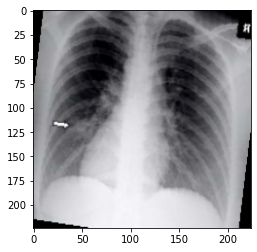

In [4]:
trans = enhance_trans(224, 'gamma', show=True)
img_trans,_ = trans(img)
img_trans = transform_invert(img_trans,_)
plt.imshow(img_trans)
# img_trans.show()
# img_trans.save('gamma.png')
_ = trans.get_gamma_trans(img,verbal=True)


CLAHE

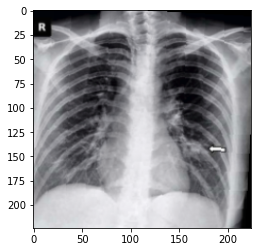

In [5]:
trans = enhance_trans(224, 'clahe', show=True)
img_trans,_ = trans(img)
img_trans = transform_invert(img_trans,_)
plt.imshow(img_trans)
# img_trans.show()
if save:
    img_trans.save('clahe.png')

None

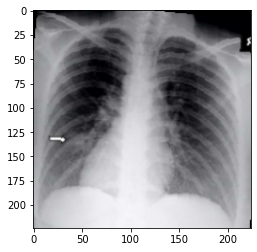

In [6]:
trans = enhance_trans(224, None, show=True)
img_trans,_ = trans(img)
img_trans = transform_invert(img_trans,_)
plt.imshow(img_trans)
# img_trans.show()
if save:
    img_trans.save('original.png')

mixup


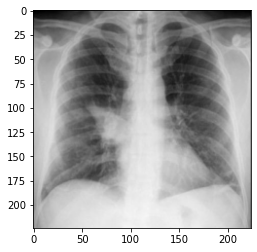

In [7]:
img_path = 'sample_mix.png'
trans = transforms.Resize((224,224))
img2 = Image.open(img_path).convert('RGB')
img2 = trans(img2)
plt.imshow(img2)
if save:
    img2.save('sample_mix_trans.png')

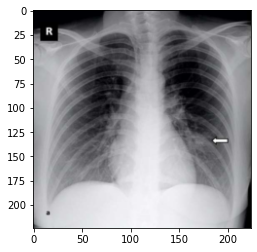

In [8]:
img_path = 'sample1.png'
img = Image.open(img_path).convert('RGB')
img = trans(img)
plt.imshow(img)
if save:
    img.save('sample1_trans.png')

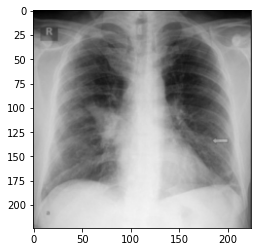

In [9]:
lam = 0.3
img_mix = lam * np.array(img.convert('L')) + (1-lam) * np.array(img2.convert('L'))
img_mix = img_mix.astype(int)
# img_mix.shape
img_mix = Image.fromarray(img_mix).convert('RGB')
# img_mix.show()
plt.imshow(img_mix)
if save:
    img_mix.save('mixup.png')